##### Work Flow of Project
- 1- Collecting credit card data
- 2- Data Pre processing
- 3- Data Analysis (Visualization step)
- 4- Train/Test split
- 5- Training  (Logistic regression Model)
   - As we know Logistic regression Model is used for binary classification problems.In my projects we also have to check  whether the transaction was legit or fraud
- 6- Model Evaluation

## Step 1- Data Collection
-  Dataset Source - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- The data consists of 31 column and 284807 rows.


## Step 2- Data Preprocessing

### 2.1 Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.head(5)
#Time of the transaction from the previous transaction
#V1 -- V28 are the features about transaction the information in these features is sensitive so they have converted them into prinicipal component analysis method 
#PCA aims to reduce the dimensionality of a dataset while preserving its important features.
# class is a check whether the transaction is legit or not (0 for legit or 1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Checking for missing values 

In [9]:
df.isna().sum()
#There are not null values in any of the columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Step3 - Data Analysis

### Distribution of "Legit"and ""Fraudlent" Transaction
- This can be checked using the column named as "Class"

In [10]:
# 0 represents Legit Transaction and 1 represents Fraudlent Transaction 
# This code uses boolean indexing to filter the 'Class' column for legit (0) and fraudulent (1) transactions
legit = (df['Class'] == 0).sum()
fraudulent = (df['Class'] == 1).sum()
print("Number of Legit transactions are:", legit)
print("Number of Fraudlent transactions are:", fraudulent)

Number of Legit transactions are: 284315
Number of Fraudlent transactions are: 492


In [11]:
#Another method
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

###### -The number for fraudulent transaction is very low as we can see the 90% of data covers for 0 meaning legit transaction
- Thus this is an unblanced dataset

###### 0->Normal or Legit transaction
###### 1-> Fraudulent transaction
- Now we are seperating data for analysis

In [12]:
legit = df[df.Class == 0]
fraud= df[df.Class == 1]


In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
#Statistical measures of our data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### comparing value for both classes


In [16]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
#What information we got from above results as we can see the normal transaction is varying too much from the fraud one 

#### Dealing with unbalanced data 
- we will use the method "Undersampling"
- Building a sample dataset containing similar distribution of normal transaction and the fraudulent transaction
- No of fraudulent transaction--> 492
- Now from Legit transaction we will take some random 492 transaction and combine it with the 492 Fraudulent transaction to get balance amount of data
- It will give us the unifrom distribution it will help us to get better prediction from the model as we saw the no of legit transaction were way more higher than the Fraudulent ones

In [18]:
#taking random sample from legit data
legit_sample=legit.sample(n=492)

#### Now concatenate both dataframes 
- legit and Fraudulent ones

In [19]:
new_dataset= pd.concat([legit_sample,fraud] ,axis=0)
#axis=0 represent the rows

In [20]:
new_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122624,76631.0,-0.873160,0.575296,2.151212,1.879479,-0.970355,0.395094,-0.491162,0.845418,0.573364,...,-0.225462,-0.421302,0.133941,0.566850,-0.489951,-0.464728,0.105690,0.069185,13.79,0
79602,58088.0,1.297592,-0.423734,0.015037,-0.608075,-0.616963,-0.443504,-0.601696,-0.054034,-0.780073,...,0.080058,0.125608,-0.055376,-0.345812,0.340500,-0.236525,0.040682,0.046527,49.90,0
10742,18229.0,-1.332495,-3.541645,0.641762,5.365468,-1.737751,1.841564,0.736281,0.124130,1.365574,...,0.289183,-1.285624,-0.959545,0.057595,-0.175431,-0.200548,-0.183664,0.234996,1209.52,0
202387,134306.0,-0.698610,-0.977637,1.062823,-2.558813,-1.765144,-0.647720,-1.295551,0.525775,-1.084280,...,-0.131352,0.084374,0.415527,-0.017737,-0.242137,-0.338680,0.071882,-0.090474,46.00,0
95283,65239.0,1.162079,0.206897,0.008673,1.025444,0.300167,0.105762,0.162058,-0.075150,-0.110606,...,0.081629,0.268647,-0.235519,-0.734118,0.728304,-0.206834,0.031353,0.020104,49.99,0


In [21]:
new_dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [23]:
#Hence we got balanced dataset

In [24]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97003.666667,-0.014267,-0.019088,-0.054472,0.007212,0.006988,0.053824,0.088560,-0.006293,-0.009977,...,0.037536,0.037491,-0.011908,0.010552,0.001766,0.009724,-0.025507,0.005259,-0.010048,102.888720
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


##### spilliting the data into feautures(v1-v28,amount) and targets (0 or 1)

In [25]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [26]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
122624,76631.0,-0.873160,0.575296,2.151212,1.879479,-0.970355,0.395094,-0.491162,0.845418,0.573364,...,-0.201596,-0.225462,-0.421302,0.133941,0.566850,-0.489951,-0.464728,0.105690,0.069185,13.79
79602,58088.0,1.297592,-0.423734,0.015037,-0.608075,-0.616963,-0.443504,-0.601696,-0.054034,-0.780073,...,0.199479,0.080058,0.125608,-0.055376,-0.345812,0.340500,-0.236525,0.040682,0.046527,49.90
10742,18229.0,-1.332495,-3.541645,0.641762,5.365468,-1.737751,1.841564,0.736281,0.124130,1.365574,...,2.125589,0.289183,-1.285624,-0.959545,0.057595,-0.175431,-0.200548,-0.183664,0.234996,1209.52
202387,134306.0,-0.698610,-0.977637,1.062823,-2.558813,-1.765144,-0.647720,-1.295551,0.525775,-1.084280,...,-0.500253,-0.131352,0.084374,0.415527,-0.017737,-0.242137,-0.338680,0.071882,-0.090474,46.00
95283,65239.0,1.162079,0.206897,0.008673,1.025444,0.300167,0.105762,0.162058,-0.075150,-0.110606,...,0.008067,0.081629,0.268647,-0.235519,-0.734118,0.728304,-0.206834,0.031353,0.020104,49.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [27]:
#Labels
Y

122624    0
79602     0
10742     0
202387    0
95283     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

## Step4- Train/Test split
- splitting the dataset to train data and test data

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [29]:
#20% of data will be stored in Y_train

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


## Step5- Model Training

In [31]:
model=LogisticRegression()

#### Step 5.1- Training LogisticRegression model with training data

In [32]:
 model.fit(X_train,Y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step6- Model Evaluation
- Accuracy score

In [33]:
#accuracy on training data


In [34]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [35]:
print('Accuracy on training data :',training_data_accuracy)

Accuracy on training data : 0.9555273189326556


### Evaluation of X_test data to check accuracy

In [36]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)


In [37]:
print('Accuracy on testing data :',test_data_accuracy)

Accuracy on testing data : 0.934010152284264


## Visualization(Matplotlib)

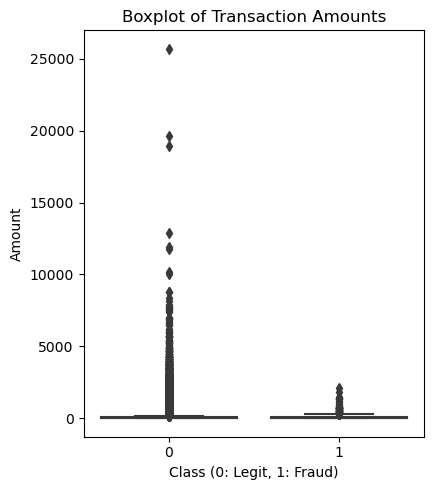

In [50]:

# Assuming your DataFrame is named df
plt.figure(figsize=(8, 5))



# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Class (0: Legit, 1: Fraud)')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


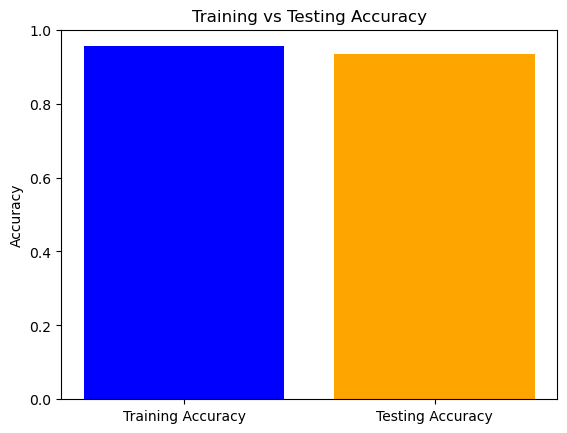

In [39]:




# Data
labels = ['Training Accuracy', 'Testing Accuracy']
accuracies = [training_data_accuracy, test_data_accuracy]

# Plotting
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # set y-axis limits to represent accuracy scale (0 to 1)
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.show()


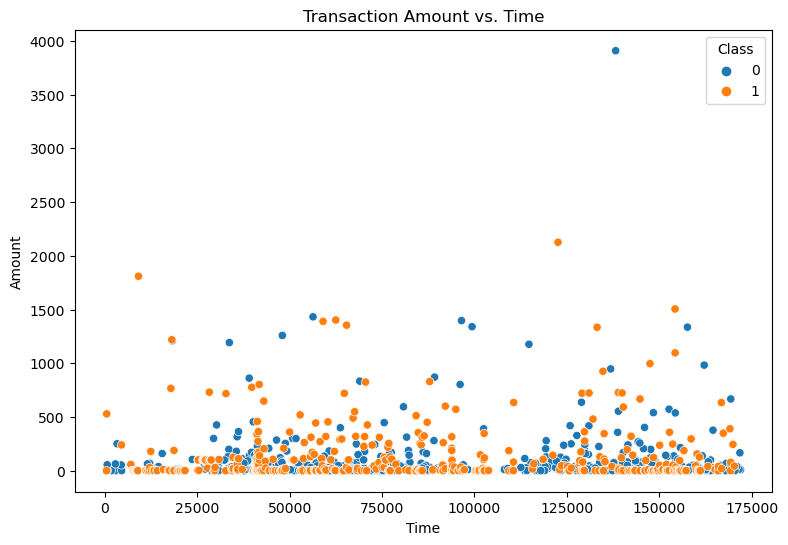

In [44]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=new_dataset)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


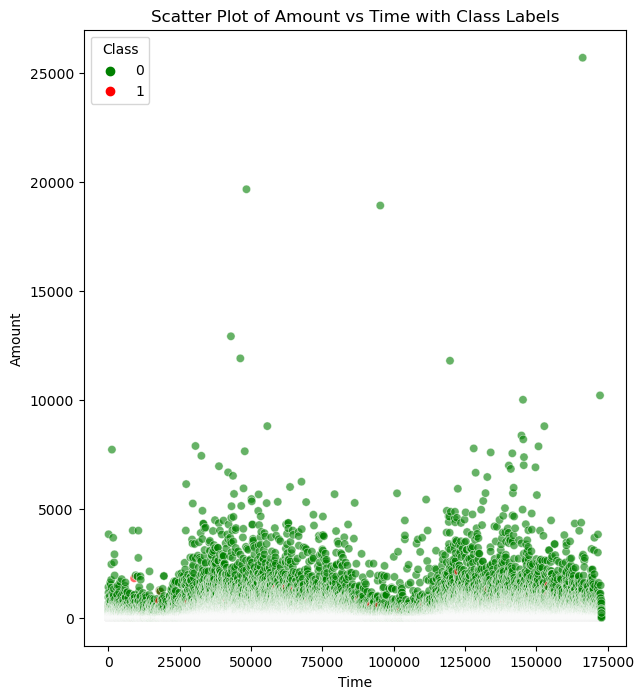

In [51]:
plt.figure(figsize=(7, 8))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette={0: 'green', 1: 'red'}, alpha=0.6)

# Setting plot labels and title
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount vs Time with Class Labels')

# Displaying the plot
plt.show()